In [4]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px

In [5]:
df = pd.read_csv('/content/Final_merged_data.csv')

In [6]:
df.head()

,Year,Country,Item,Rainfall (mm),Temperature (Celcius),Yield (hg/ha),Pesticides (Tons)
0,2010,Indonesia,"Abaca, manila hemp, raw",190.783333,26.6,8275,313639.25
1,2010,Indonesia,Areca nuts,190.783333,26.6,12623,313639.25
2,2010,Indonesia,Avocados,190.783333,26.6,109367,313639.25
3,2010,Indonesia,Bananas,190.783333,26.6,568256,313639.25
4,2010,Indonesia,"Beans, dry",190.783333,26.6,11300,313639.25


In [7]:
df.tail()

,Year,Country,Item,Rainfall (mm),Temperature (Celcius),Yield (hg/ha),Pesticides (Tons)
715,2021,Indonesia,Tea leaves,199.55,26.8,50244,283297.13
716,2021,Indonesia,Tomatoes,199.55,26.8,187605,283297.13
717,2021,Indonesia,Unmanufactured tobacco,199.55,26.8,11544,283297.13
718,2021,Indonesia,"Vanilla, raw",199.55,26.8,1528,283297.13
719,2021,Indonesia,Watermelons,199.55,26.8,138295,283297.13


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   720 non-null    int64  
 1   Country                720 non-null    object 
 2   Item                   720 non-null    object 
 3   Rainfall (mm)          720 non-null    float64
 4   Temperature (Celcius)  720 non-null    float64
 5   Yield (hg/ha)          720 non-null    int64  
 6   Pesticides (Tons)      720 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 39.5+ KB


In [9]:
df.describe()

,Year,Rainfall (mm),Temperature (Celcius),Yield (hg/ha),Pesticides (Tons)
count,720.000000,720.000000,720.000000,7.200000e+02,720.000000
mean,2015.500000,169.913194,26.733333,1.355161e+05,276415.640000
std,3.454452,40.060258,0.170085,2.171315e+05,40694.310061
min,2010.000000,99.100000,26.500000,6.840000e+02,206061.700000
25%,2012.750000,129.493750,26.600000,8.886250e+03,254547.252500
50%,2015.500000,176.741667,26.700000,6.233450e+04,276713.360000
75%,2018.250000,195.787500,26.825000,1.562635e+05,313211.652500
max,2021.000000,235.958333,27.100000,1.292117e+06,349797.630000


In [10]:
df.isnull().sum()

Year                     0
Country                  0
Item                     0
Rainfall (mm)            0
Temperature (Celcius)    0
Yield (hg/ha)            0
Pesticides (Tons)        0
dtype: int64

In [11]:
df['Item'].value_counts()

Abaca, manila hemp, raw                                                      12
Areca nuts                                                                   12
Oil palm fruit                                                               12
Onions and shallots, dry (excluding dehydrated)                              12
Oranges                                                                      12
Other beans, green                                                           12
Other fruits, n.e.c.                                                         12
Other nuts (excluding wild edible nuts and groundnuts), in shell, n.e.c.     12
Other pulses n.e.c.                                                          12
Other stimulant, spice and aromatic crops, n.e.c.                            12
Other sugar crops n.e.c.                                                     12
Other tropical fruits, n.e.c.                                                12
Other vegetables, fresh n.e.c.          

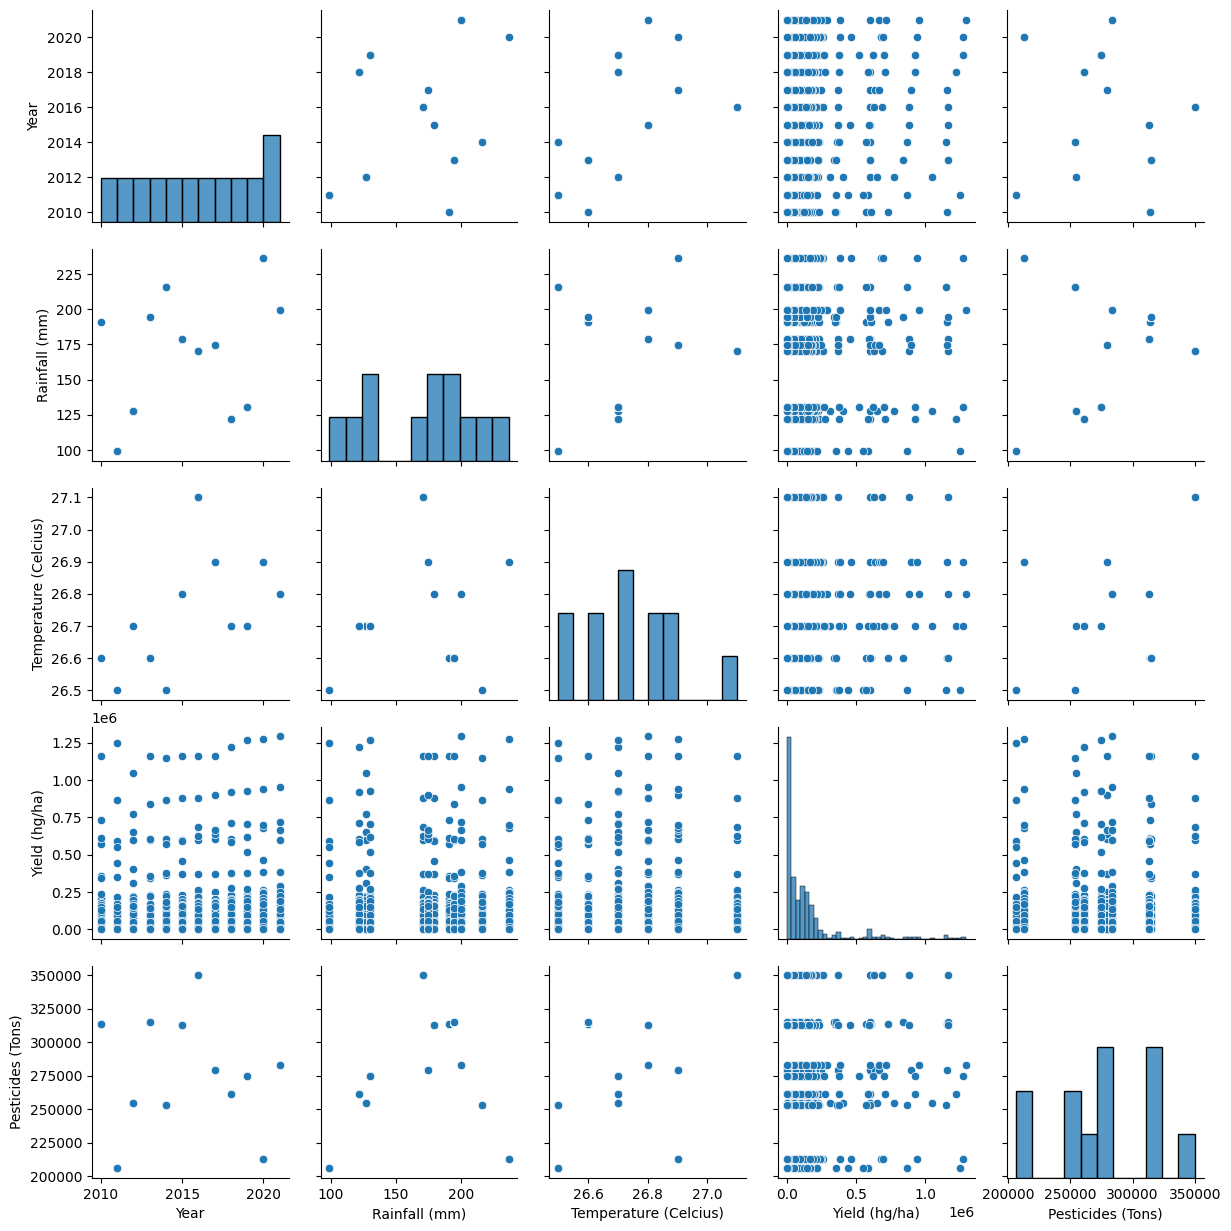

In [12]:
# checking pairplot between columns

sns.pairplot(df)

<ipython-input-13-0578ecdfde0a>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rain_data.groupby('Year').mean().plot(legend=None, marker = 'o')


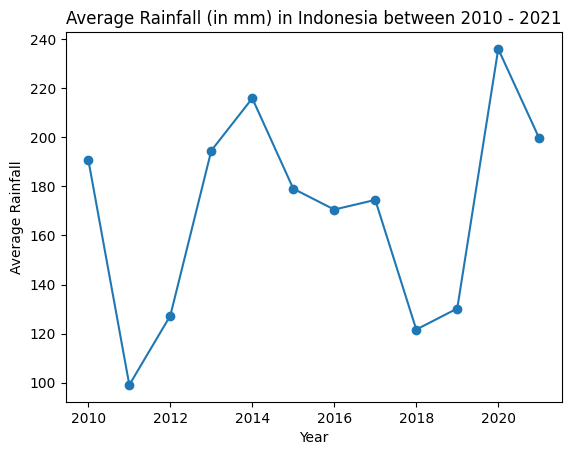

In [13]:
# rain data

rain_data = pd.read_csv('/content/Updated_rainfall.csv')

rain_data.groupby('Year').mean().plot(legend=None, marker = 'o')
plt.title('Average Rainfall (in mm) in Indonesia between 2010 - 2021')
plt.xlabel('Year')
plt.ylabel('Average Rainfall')
plt.show()

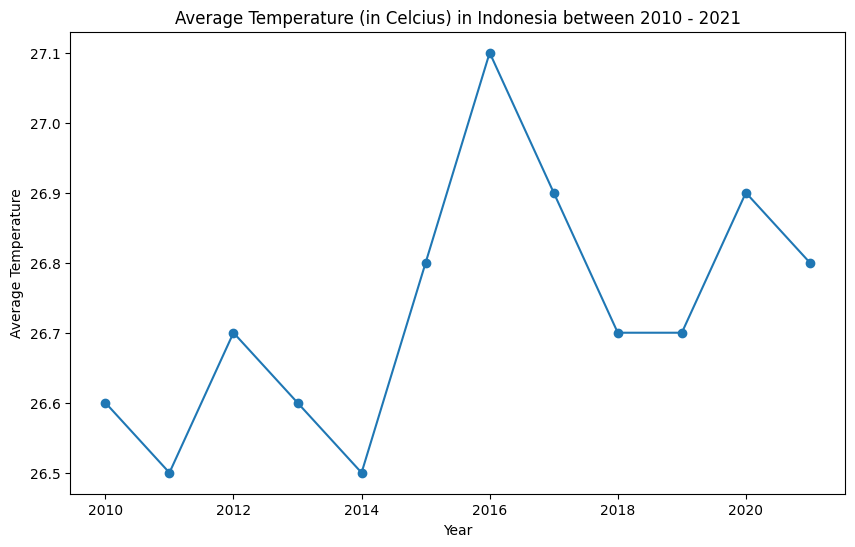

In [14]:
# temperature data

temp_data = pd.read_csv('/content/temp_csv.csv')
temp_data_filtered = temp_data[temp_data['Year'] <= 2021]
plt.figure(figsize=(10, 6))
plt.plot(temp_data_filtered['Year'], temp_data_filtered['avg_temp'], marker='o')

plt.title('Average Temperature (in Celcius) in Indonesia between 2010 - 2021')
plt.xlabel('Year')
plt.ylabel('Average Temperature')

plt.show()

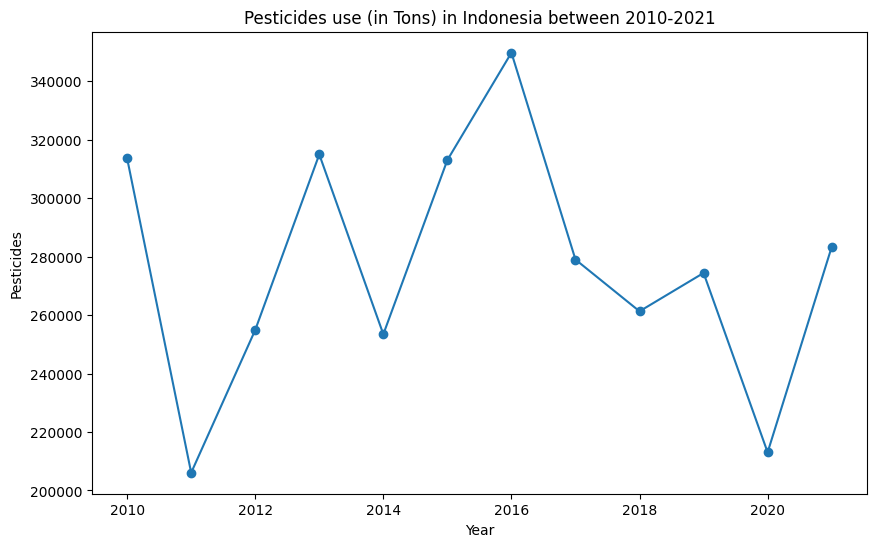

In [15]:
# pesticides data

pest_data = pd.read_csv('/content/FAOSTAT_pesticide.csv')

plt.figure(figsize=(10, 6))
plt.plot(pest_data['Year'], pest_data['Value'], marker='o')

plt.title('Pesticides use (in Tons) in Indonesia between 2010-2021')
plt.xlabel('Year')
plt.ylabel('Pesticides')
plt.show()

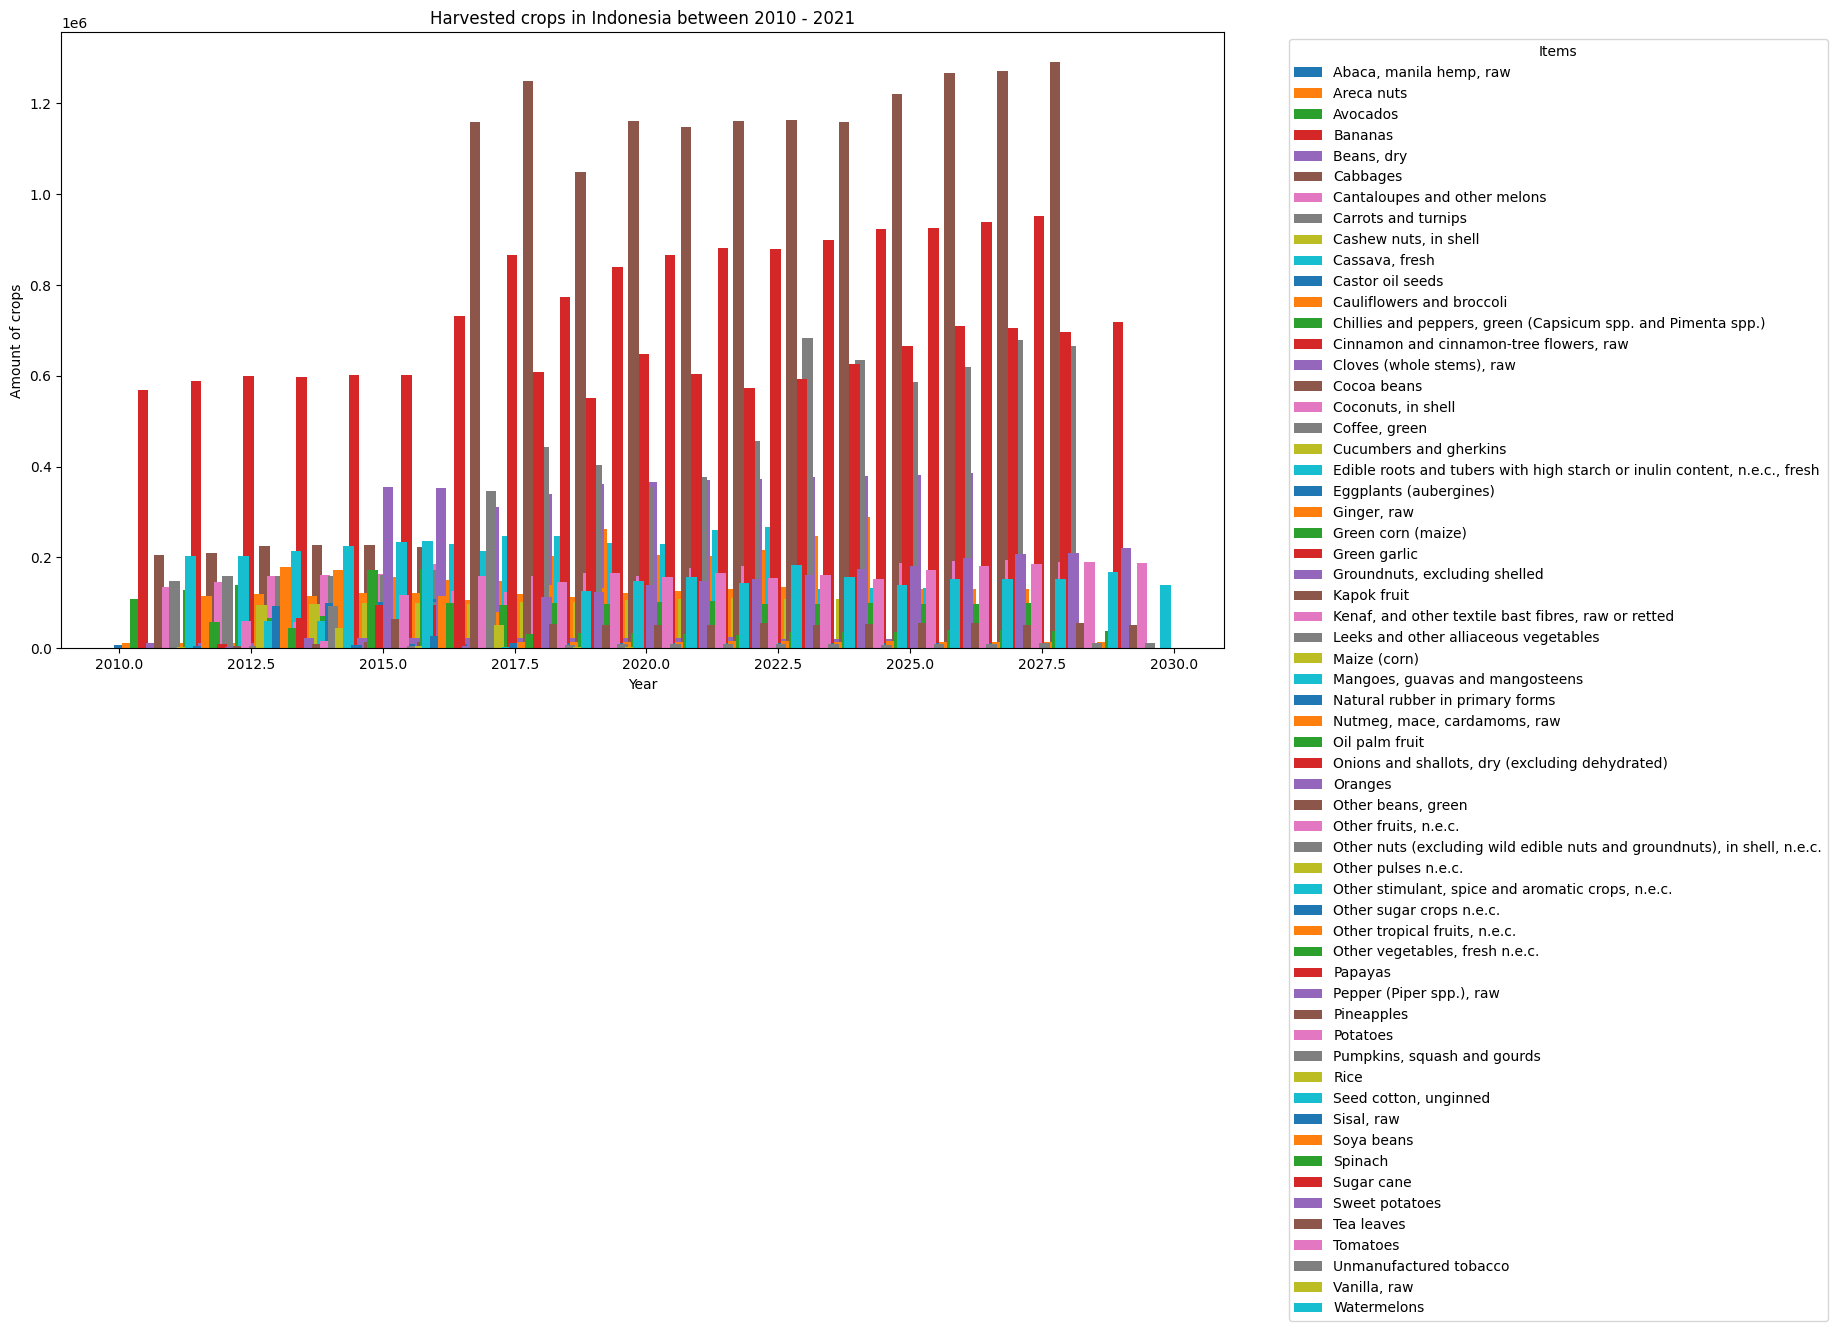

In [25]:
# crop data

crop_data = pd.read_csv('/content/FAOSTAT_crops.csv')
plt.figure(figsize=(15, 8))
items = crop_data['Item'].unique()

for i, item in enumerate(items):
    item_data = crop_data[crop_data['Item'] == item]
    plt.bar(item_data['Year'] + i * 0.15, item_data['Value'], width=0.2, label=item)

plt.title('Harvested crops in Indonesia between 2010 - 2021')
plt.xlabel('Year')
plt.ylabel('Amount of crops')
plt.legend(title='Items', bbox_to_anchor=(1.05, 1))
plt.show()

In [26]:
# check the top 10 highest produced crop

df.groupby(['Item'], sort=True)['Yield (hg/ha)'].sum().nlargest(10)

Item
Pineapples                                           14301841
Papayas                                              10478009
Sugar cane                                            7700144
Bananas                                               6947461
Pumpkins, squash and gourds                           6250509
Oranges                                               4356127
Cassava, fresh                                        2788118
Other stimulant, spice and aromatic crops, n.e.c.     2755044
Cabbages                                              2556087
Ginger, raw                                           2432733
Name: Yield (hg/ha), dtype: int64

<ipython-input-32-ebb72510d719>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


Text(0.5, 1.0, 'Heatmap')

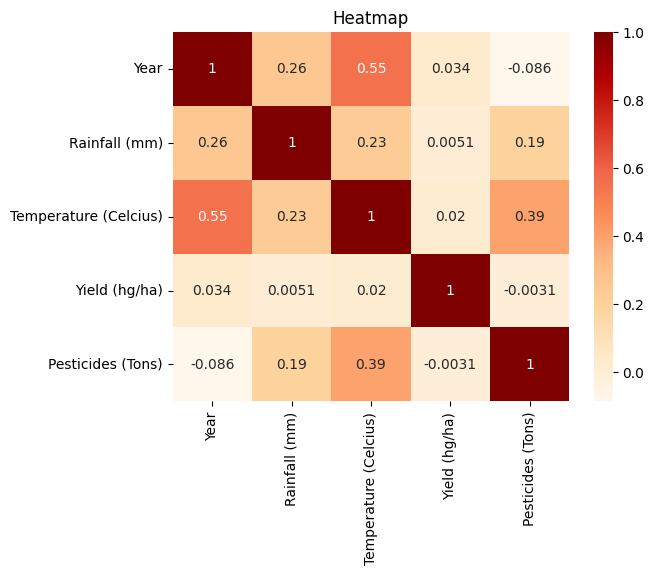

In [32]:
# check correlation

cor = df.corr()
sns.heatmap(cor, cmap = 'OrRd', annot=True)
plt.title('Heatmap')